In [1]:
import os
os.chdir("../../../")

import numpy as np
import pandas as pd

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
from tqdm import tqdm

In [2]:
target_dir = os.getcwd() + "/data/text/solomon_islands/"
ss = pd.read_csv(target_dir+"solomon_stars_news.csv").drop("Unnamed: 0", axis=1)

In [3]:
ss["news"] = ss["news"].str.replace("\n", "")

In [20]:
sid = SentimentIntensityAnalyzer()

score_df = pd.DataFrame()
with tqdm(total=len(ss[:1000])) as pbar:
    for news in ss["news"][:1000]:
        if type(news) == str:
            scores = sid.polarity_scores(news)
            ss_temp = pd.DataFrame(scores, columns=scores.keys(), index=[0])
            if score_df.empty:
                score_df = ss_temp
            else:
                score_df = pd.concat([score_df, ss_temp], axis=0)
            pbar.update(1)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 515.68it/s]


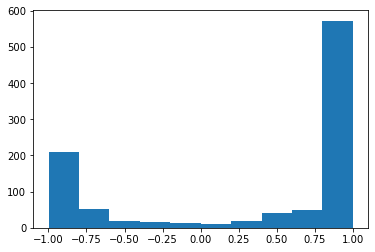

In [21]:
import matplotlib.pyplot as plt
plt.hist(score_df["compound"]);